# Work by: Leopoldo Rojo Romero

Student ID: 2023355

Higher Diploma in Science in Data Analytics for Business

Data Visualisation Techniques

David McQuaid

CCT College

Dublin, Ireland

*NOTE: If you are using the most recent version of Jupyter Notebook (7.0.8), you can navigate this notebook easily using the tabe of contents (Crtl+Shift+K).*

## Scenario: 

You have been retained by a retail company to analyse a dataset based on video games. This analysis will help determine the sales strategy for the company in their upcoming Winter season.   

In [1]:
# Updates if needed
!pip install --upgrade pandas
!pip install --upgrade openpyxl
!pip install --upgrade bottleneck
!pip install missingno

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno

warnings.filterwarnings('ignore')
%matplotlib inline

### Load our dataset and explore it by performing an Exploratory Data Analysis (EDA)

By performing an EDA we will understand our dataset, from its shape to its data.

#### Data dictionary

In [3]:
d_dict = pd.read_excel('vgsales data dictionary.xlsx')
d_dict

Column Name                                        Description  \
0              name                                   Name of the Game   
1          platform                                     Game Platform    
2   year_of_release                                 Year Game Released   
3             genre                                       Type of Game   
4         publisher                             Name of Game Publisher   
5          na_sales                               North American Sales   
6          eu_sales                                     European Sales   
7          jp_sales                                     Japanese Sales   
8       other_sales  Sales from Other Countries Not including N-Ame...   
9      global_sales                                       Global Sales   
10     critic_score                         Critics Rating of the Game   
11     critic_count               Number of Critics who rated the game   
12       user_score                          Users Rating of the Game    
13       user_count                 Number of Users who rated the game   
14        developer                                     Developer Name   
15           rating                        Appropriate User Age Rating   

   Data Type  
0       Text  
1       Text  
2    Integer  
3       Text  
4       Text  
5      Float  
6      Float  
7      Float  
8      Float  
9      Float  
10   Integer  
11   Integer  
12     Float  
13   Integer  
14      Text  
15      Text

#### Dataset

In [4]:
df = pd.read_csv('vgsales.csv')
df.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
1           NaN        NaN         NaN       NaN    NaN  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
4           NaN        NaN         NaN       NaN    NaN

In [5]:
df.shape

(16719, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [7]:
df.describe()

Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     16450.000000  16719.000000  16719.000000  16719.000000   
mean       2006.487356      0.263330      0.145025      0.077602   
std           5.878995      0.813514      0.503283      0.308818   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2020.000000     41.360000     28.960000     10.220000   

        Other_Sales  Global_Sales  Critic_Score  Critic_Count    User_Count  
count  16719.000000  16719.000000   8137.000000   8137.000000   7590.000000  
mean       0.047332      0.533543     68.967679     26.360821    162.229908  
std        0.186710      1.547935     13.938165     18.980495    561.282326  
min        0.000000      0.010000     13.000000      3.000000      4.000000  
25%        0.000000      0.060000     60.000000     12.000000     10.000000  
50%        0.010000      0.170000     71.000000     21.000000     24.000000  
75%        0.030000      0.470000     79.000000     36.000000     81.000000  
max       10.570000     82.530000     98.000000    113.000000  10665.000000

#### Null Values

Before searching for null values, lets replace infinite values to NaN values, this will help us see these values as NaN values in the following '.isnull()' operation, in case that we have them.

In [8]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

Number of null values in our dataset in each feature.

In [9]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

Percentage of missing values in our dataset in each feature.

In [10]:
df.isnull().mean()*100

Name                0.011962
Platform            0.000000
Year_of_Release     1.608948
Genre               0.011962
Publisher           0.322986
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
Critic_Score       51.330821
Critic_Count       51.330821
User_Score         40.098092
User_Count         54.602548
Developer          39.613613
Rating             40.486871
dtype: float64

Now that we know that we have multiple missing values in our data set, lets visualise the magnitude of this using the missingno library.

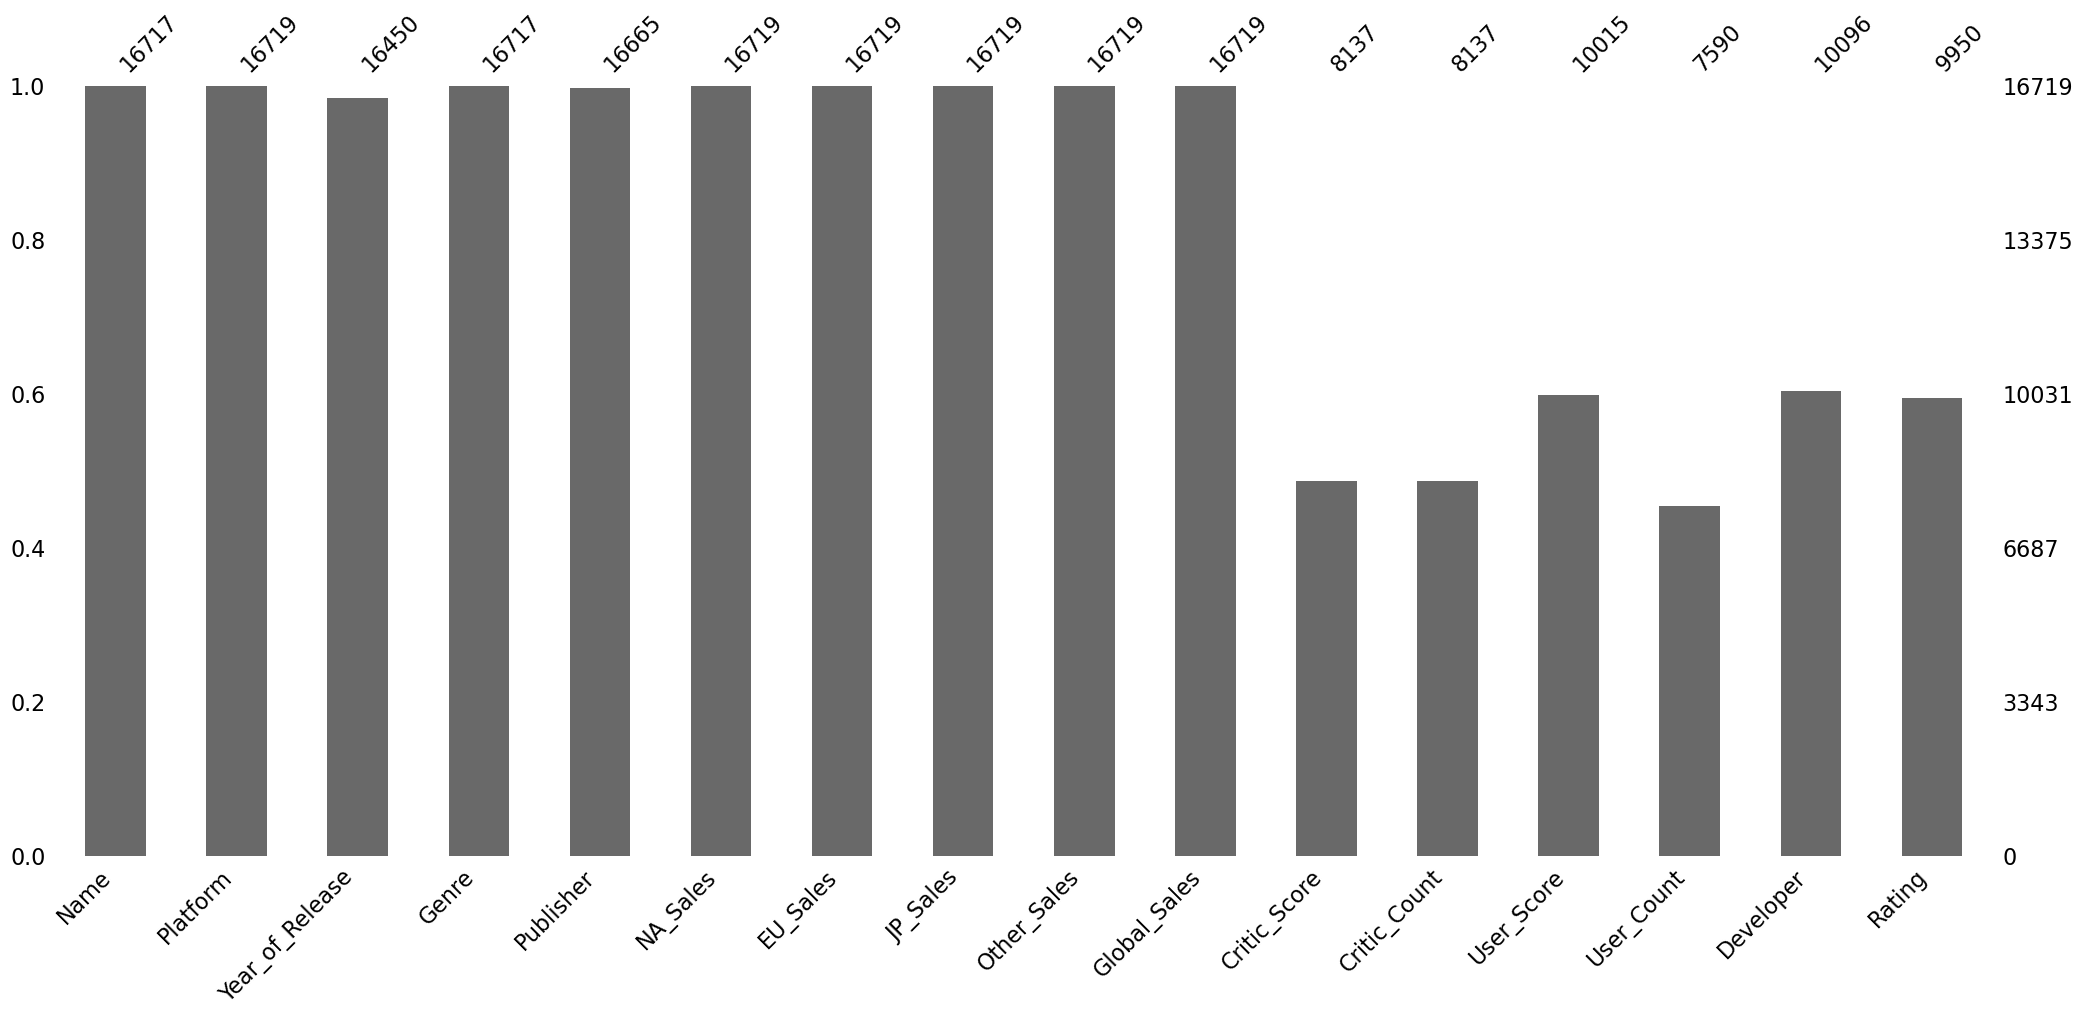

In [11]:
missingv = msno.bar(df)

In the above visualisation we can observe the proportion of missing values and we can notice that is quite significant.

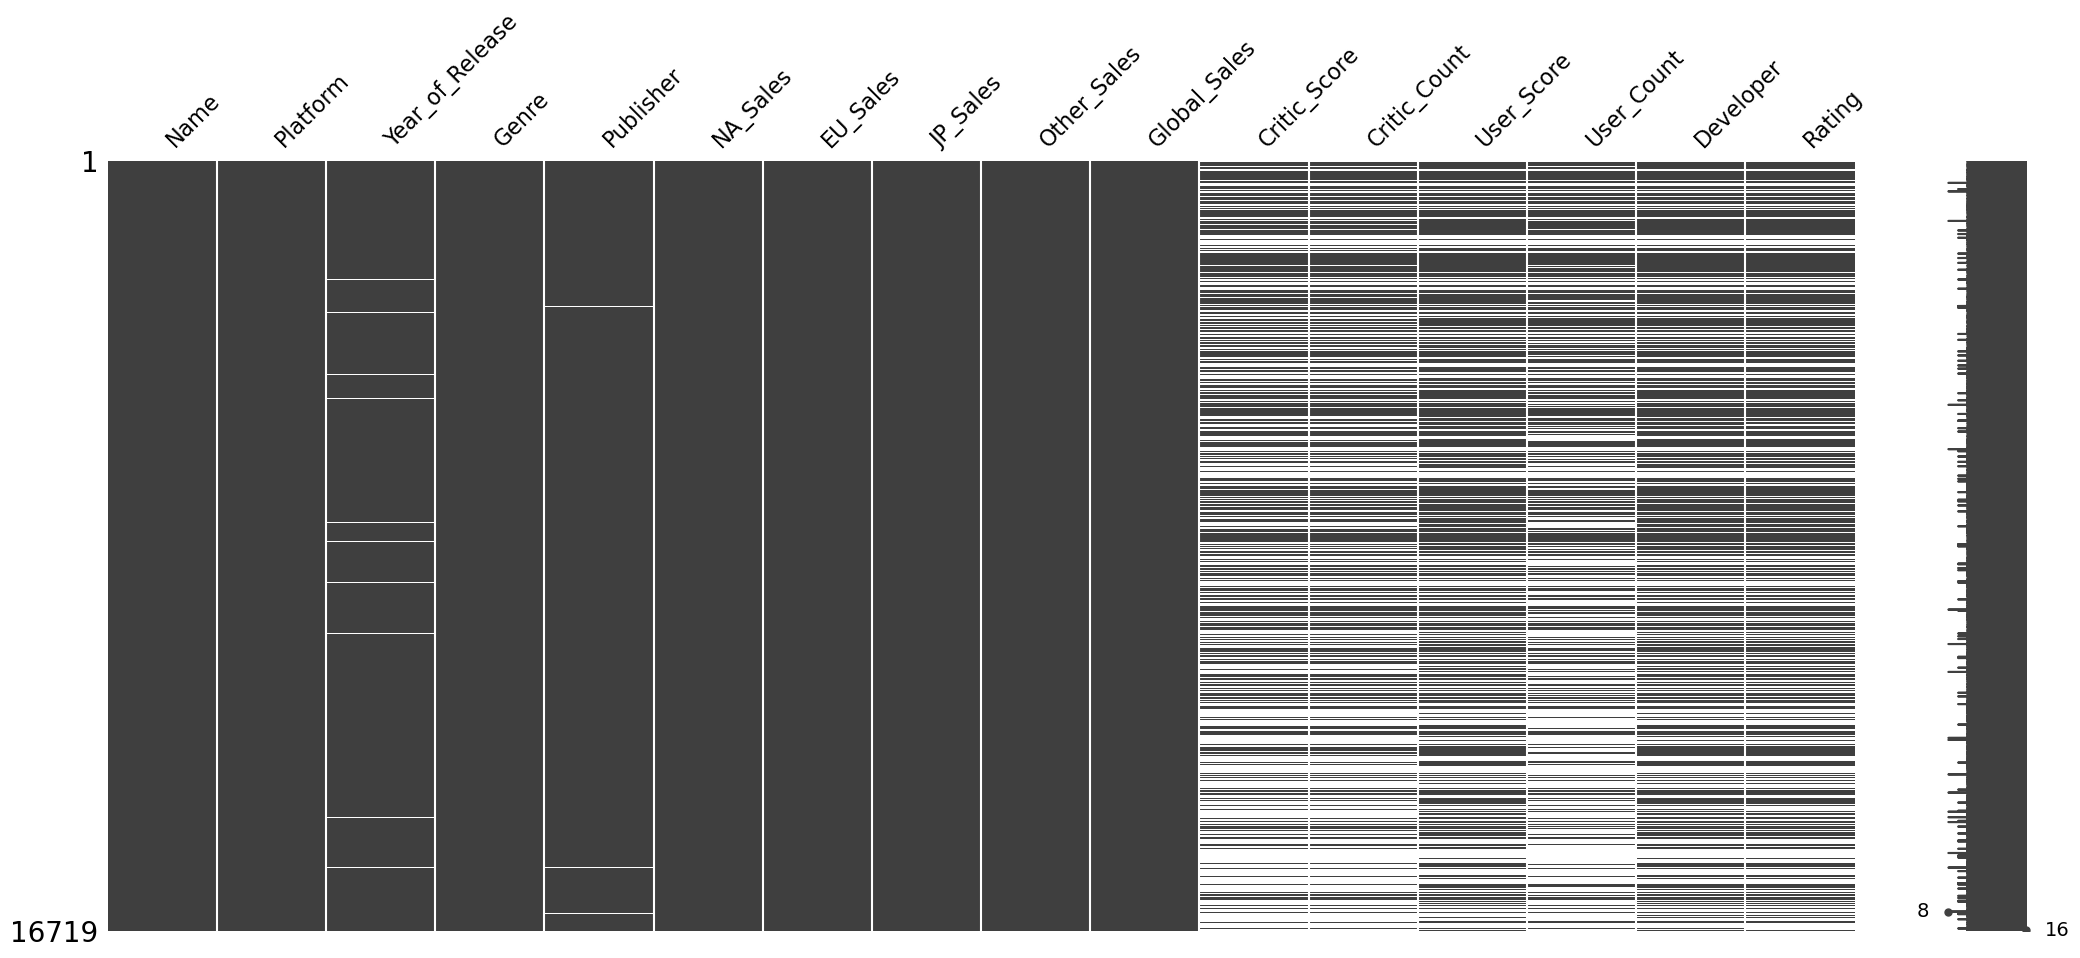

In [12]:
missingv = msno.matrix(df)

In this second visualisation of missing values, we can know where our missing values (white spaces) are in our dataset.

#### Plots to use:

- Bar plot: A type of bar graph that will help us display categorical data for an easy comparison of variables (Indeed Editorial Team, 2023).
- Scatter plot: Useful for displaying two dimensional information, can help us to identify correlations (Indeed Editorial Team, 2023a).
- Catplot (Strip plot): Useful for displaying subsets corresponding to a categorical feature, they can reveal gaps and outliers (The University of Iowa, n.d.).
- Displot (Histogram): Visaulisation tool that represents the distribution of one or multiple features by counting the number of observations (Seaborn, n.d.).

### Part 1:

•	What are the top 5 games by global sales?  
•	Is there a correlation between the “na_sales” and “jp_sales” for the years 2010-2014?  
•	What is the distribution of the most popular 4 game genres?  
•	Do older games (2005 and earlier) have a higher MEAN “eu_sales” than newer games (after 2005)?  
•	What are the 3 most common “developer” in the dataset?  


### Part 1: Task 1
•	What are the top 5 games by global sales? 

For this task, we will create a new dataset only with the features that are relevant to answer the question, furthermore, we will add the participation of each game to see in how many games the 20% of global sales are concentrated.

To ensure that we are not duplicating a game to get the participation value, we will add the columns 'Plataform' and 'Year_of_Release' to drop any duplicated game.

In [13]:
top_5games = pd.DataFrame()
top_5games['Game_Name'] = df['Name']
top_5games['Global_Sales'] = df['Global_Sales']
top_5games['Participation'] = (top_5games['Global_Sales']*100) / (df['Global_Sales'].sum())
top_5games['Total_Participation'] = top_5games['Participation'].cumsum()
top_5games['Platform'] = df['Platform']
top_5games['Year_of_Release'] = df['Year_of_Release']
top_5games.head()

Game_Name  Global_Sales  Participation  Total_Participation  \
0                Wii Sports         82.53       0.925193             0.925193   
1         Super Mario Bros.         40.24       0.451106             1.376299   
2            Mario Kart Wii         35.52       0.398193             1.774492   
3         Wii Sports Resort         32.77       0.367364             2.141856   
4  Pokemon Red/Pokemon Blue         31.37       0.351670             2.493526   

  Platform  Year_of_Release  
0      Wii           2006.0  
1      NES           1985.0  
2      Wii           2008.0  
3      Wii           2009.0  
4       GB           1996.0

In [14]:
top_5games['Game_Name'].duplicated().sum()

5156

In [15]:
check_dup = top_5games.drop_duplicates(['Game_Name','Platform','Year_of_Release'], keep='first')

In [16]:
check_dup['Game_Name'].duplicated().sum()

5154

In [17]:
top_5games = top_5games.drop_duplicates(['Game_Name','Platform','Year_of_Release'], keep='first')

In [18]:
pd.set_option('display.max_rows', None)
top_5games.sort_values(by='Global_Sales', ascending=False)

Game_Name  Global_Sales  \
0                                             Wii Sports         82.53   
1                                      Super Mario Bros.         40.24   
2                                         Mario Kart Wii         35.52   
3                                      Wii Sports Resort         32.77   
4                               Pokemon Red/Pokemon Blue         31.37   
5                                                 Tetris         30.26   
6                                  New Super Mario Bros.         29.80   
7                                               Wii Play         28.92   
8                              New Super Mario Bros. Wii         28.32   
9                                              Duck Hunt         28.31   
10                                            Nintendogs         24.67   
11                                         Mario Kart DS         23.21   
12                           Pokemon Gold/Pokemon Silver         23.10   
13                                               Wii Fit         22.70   
14                                    Kinect Adventures!         21.81   
15                                          Wii Fit Plus         21.79   
16                                    Grand Theft Auto V         21.04   
17                         Grand Theft Auto: San Andreas         20.81   
18                                     Super Mario World         20.61   
19          Brain Age: Train Your Brain in Minutes a Day         20.15   
20                         Pokemon Diamond/Pokemon Pearl         18.25   
21                                      Super Mario Land         18.14   
22                                   Super Mario Bros. 3         17.28   
23                                    Grand Theft Auto V         16.27   
24                           Grand Theft Auto: Vice City         16.15   
25                         Pokemon Ruby/Pokemon Sapphire         15.85   
26           Brain Age 2: More Training in Minutes a Day         15.29   
27                           Pokemon Black/Pokemon White         15.14   
28                                Gran Turismo 3: A-Spec         14.98   
29                        Call of Duty: Modern Warfare 3         14.73   
30               Pokémon Yellow: Special Pikachu Edition         14.64   
31                             Call of Duty: Black Ops 3         14.63   
32                               Call of Duty: Black Ops         14.61   
33                                   Pokemon X/Pokemon Y         14.60   
34                            Call of Duty: Black Ops II         13.79   
35                            Call of Duty: Black Ops II         13.67   
36                        Call of Duty: Modern Warfare 2         13.47   
37                        Call of Duty: Modern Warfare 3         13.32   
38                                  Grand Theft Auto III         13.10   
39                               Super Smash Bros. Brawl         12.84   
40                                          Mario Kart 7         12.66   
41                               Call of Duty: Black Ops         12.63   
42                                    Grand Theft Auto V         12.61   
43                           Animal Crossing: Wild World         12.13   
44                                                Halo 3         12.12   
45                                        Super Mario 64         11.89   
46                  Pokemon HeartGold/Pokemon SoulSilver         11.77   
47             Pokemon Omega Ruby/Pokemon Alpha Sapphire         11.68   
48                                        Gran Turismo 4         11.66   
49                                    Super Mario Galaxy         11.35   
50                    Super Mario Land 2: 6 Golden Coins         11.18   
51                                   Grand Theft Auto IV         11.01   
52                                          Gran Turismo         10.95   
53                                   Super Mario 3D

After removing the duplicated games, we now know that 20% of the global sales are concentrated in only 149 games, this information may be relevant for marketing and sales procedures at a company.

In [19]:
pd.reset_option('max_rows')

To visualise the top 5 games by global sales we will use a bar plot in a horizontal way with the seaborn library.

- We are plotting this bar plot in a horizontal way due to the length that the game names may have.
- We are setting our title on the top with bold and big letters to identify with ease what the plot is about.
- We are using red triangles to highlight the top 5 games inside a top 10 plot.
- We are using the 'Spectral' palette to make the visualisation gentle to the eye and easy to differentiate one game from another.

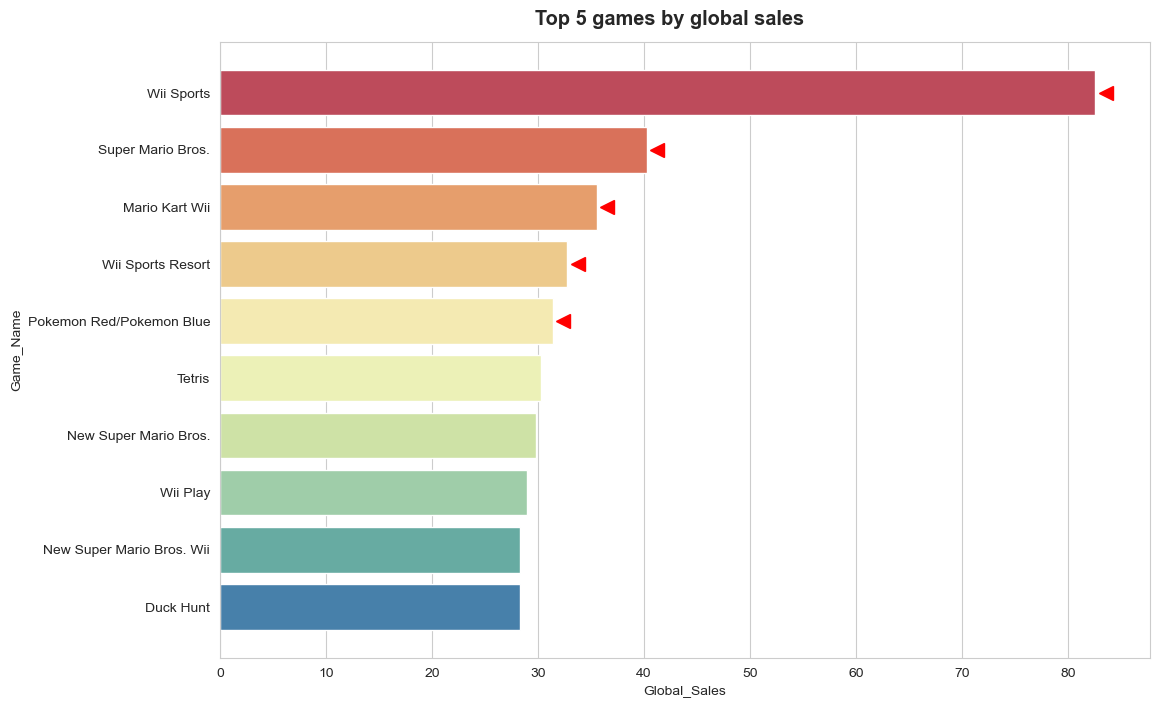

In [20]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
ax = sns.barplot(data=top_5games.head(10), x='Global_Sales', y='Game_Name', palette='Spectral', orient='h')
ax.figure.suptitle('Top 5 games by global sales', y=.92, weight='bold', size='x-large');
ax.plot(83.53,'Wii Sports', '<', markersize=10, color='r');
ax.plot(41.24,'Super Mario Bros.', '<', markersize=10, color='r');
ax.plot(36.52,'Mario Kart Wii', '<', markersize=10, color='r');
ax.plot(33.77,'Wii Sports Resort', '<', markersize=10, color='r');
ax.plot(32.37,'Pokemon Red/Pokemon Blue', '<', markersize=10, color='r');

### Part 1: Task 2
•	Is there a correlation between the “na_sales” and “jp_sales” for the years 2010-2014? 

For this task, we will create a new dataset only with the features that are relevant to answer the question.

In [21]:
co_na_jp = pd.DataFrame()
co_na_jp['Year_of_Release'] = df['Year_of_Release']
co_na_jp['NA_Sales'] = df['NA_Sales']
co_na_jp['JP_Sales'] = df['JP_Sales']
co_na_jp = co_na_jp[co_na_jp['Year_of_Release'].between(2010, 2014)]
co_na_jp.head()

Year_of_Release  NA_Sales  JP_Sales
14           2010.0     15.00      0.24
16           2013.0      7.02      0.98
23           2013.0      9.66      0.06
27           2010.0      5.51      5.65
29           2011.0      9.04      0.13

In [22]:
co_na_jp['Year_of_Release'] = co_na_jp['Year_of_Release'].astype(int)

In [23]:
co_na_jp.sort_values(by='Year_of_Release', ascending=False)

Year_of_Release  NA_Sales  JP_Sales
16711             2014      0.00      0.01
12540             2014      0.05      0.00
2236              2014      0.33      0.02
12460             2014      0.00      0.06
12462             2014      0.03      0.00
...                ...       ...       ...
13453             2010      0.04      0.00
5386              2010      0.09      0.00
5407              2010      0.13      0.14
8488              2010      0.08      0.00
14                2010     15.00      0.24

[4169 rows x 3 columns]

In [24]:
co_na_jp.isnull().mean()*100 # Percentage of missing data

Year_of_Release    0.0
NA_Sales           0.0
JP_Sales           0.0
dtype: float64

To be able to see any correlation between JP_Sales and NA_Sales we will use a scatter plot with the seaborn library.

- We are setting our title on the top with bold and big letters to identify with ease what the plot is about.
- Since this plot is not comparing which value is higher (or intensity), we are using the 'rainbow' palette to make the visualisation gentle to the eye and easy to differentiate sales from one year to another, this in contrast to the others plots where we are using the 'Spectral' palette.
- We are putting our legend box outside the plot, this prevent the box to be over a point of our scatter plot.

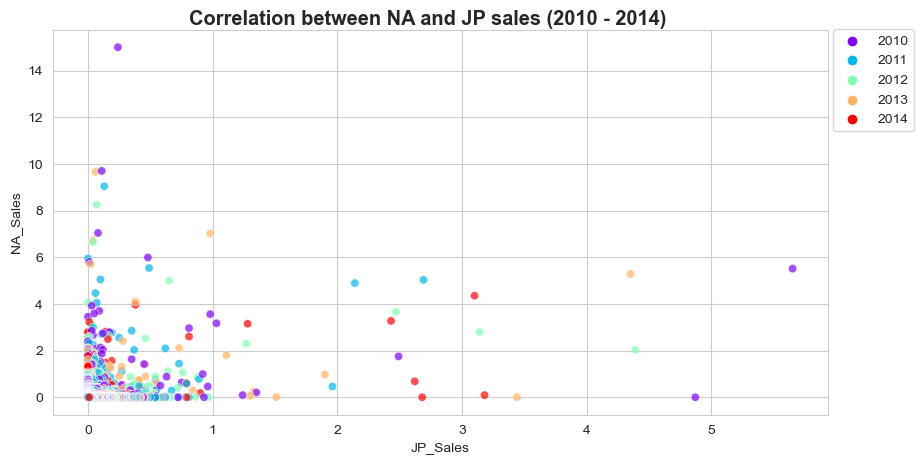

In [25]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(data=co_na_jp, x='JP_Sales', y='NA_Sales', hue='Year_of_Release', alpha=.7, palette='rainbow');
ax.figure.suptitle('Correlation between NA and JP sales (2010 - 2014)', y=.92, weight='bold', size='x-large');
plt.legend(loc='upper right',bbox_to_anchor=(1.12,1.02));

As shown above, if we try to see any correlation between JP_Sales and NA_Sales without group every sale in each year, we will not be able to see any correlation.

Following our first scatter plot, we will group every sale in each year and plot our grouped data.

In [26]:
co_na_jp_g = co_na_jp.groupby(by='Year_of_Release').sum()
co_na_jp_g

NA_Sales  JP_Sales
Year_of_Release                    
2010               300.65     59.49
2011               238.79     53.07
2012               153.26     51.80
2013               153.65     47.69
2014               132.27     39.69

In [27]:
co_na_jp_g['Year_of_Release'] = co_na_jp_g.index
co_na_jp_g

NA_Sales  JP_Sales  Year_of_Release
Year_of_Release                                     
2010               300.65     59.49             2010
2011               238.79     53.07             2011
2012               153.26     51.80             2012
2013               153.65     47.69             2013
2014               132.27     39.69             2014

To be able to see any correlation between JP_Sales and NA_Sales we will use a scatter plot with the seaborn library.

- We are setting our title on the top with bold and big letters to identify with ease what the plot is about.
- Since this plot is not comparing which value is higher (or intensity), we are using the 'rainbow' palette to make the visualisation gentle to the eye and easy to differentiate sales from one year to another, this in contrast to the others plots where we are using the 'Spectral' palette.
- We are putting our legend box outside the plot, this prevent the box to be over a point of our scatter plot.

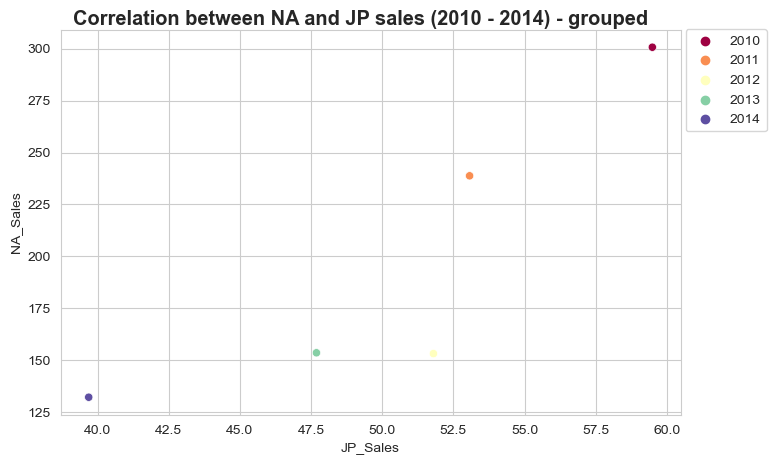

In [28]:
plt.figure(figsize=(8,5))
ax = sns.scatterplot(data=co_na_jp_g, x='JP_Sales', y='NA_Sales', hue='Year_of_Release', palette='Spectral');
ax.figure.suptitle('Correlation between NA and JP sales (2010 - 2014) - grouped', y=.92, weight='bold', size='x-large');
plt.legend(loc='upper right',bbox_to_anchor=(1.15,1.02));

Now in our grouped sales per year, we can observe a clear correlation of sales, where the sales are decreasing over time.

To better visualise the trend, we will use a bar plot for each category.

- We are setting our titles on the top with bold and big letters to identify with ease what the plots are about.
- We are using the 'Spectral' palette to make the visualisations gentle to the eye and easy to differentiate each year.

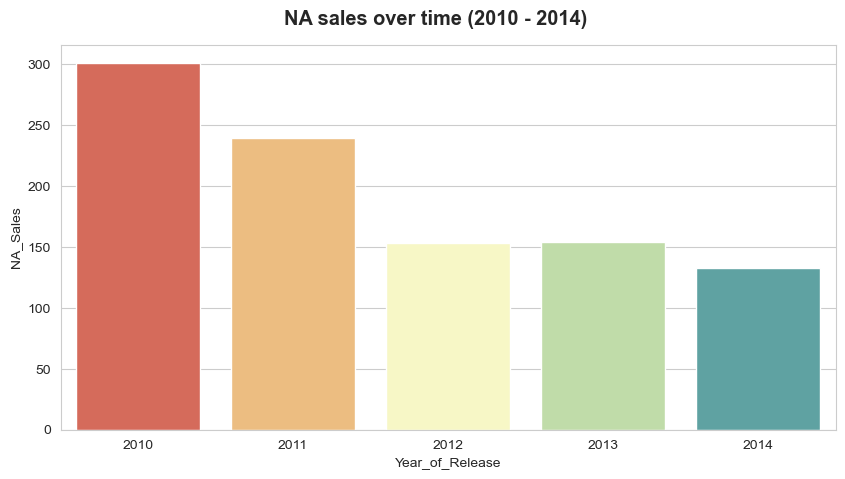

In [29]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=co_na_jp_g, x='Year_of_Release', y='NA_Sales', palette='Spectral');
ax.figure.suptitle('NA sales over time (2010 - 2014)', y=.95, weight='bold', size='x-large');

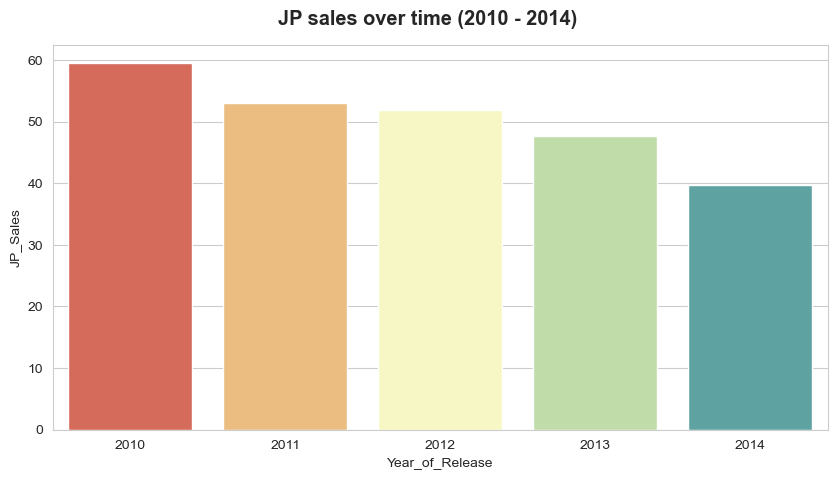

In [30]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=co_na_jp_g, x='Year_of_Release', y='JP_Sales', palette='Spectral');
ax.figure.suptitle('JP sales over time (2010 - 2014)', y=.95, weight='bold', size='x-large');

To confirm the correlation that we are appreciating in our plots, we will calculate the Pearson Correlation Coefficient (0 means no correlation and 1 or -1 means fully correlated).

In [31]:
co_na_jp_g['NA_Sales'].corr(co_na_jp_g['JP_Sales'])

0.8620419567374071

### Part 1: Task 3
•	What is the distribution of the most popular 4 game genres?

For this task, we will create a new datasets only with the features that are relevant to answer the question, first we will need to check for the top 4 game genres and then 'filter' our data by those game genres.

Because the game genres are a cateogrical feature, we will answer this task by looking at the distribution of these genres by global sales.

Furthermore, we will take a look of the distributions of the top 4 plataforms within the top 4 genres.

In [32]:
top4_genre = df.Genre.value_counts()

In [33]:
top4_genre

Genre
Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: count, dtype: int64

In [34]:
top4 = ['Action', 'Sports', 'Misc', 'Role-Playing']
mask = df['Genre'].isin(top4)
top4_genre = df[mask]

In [35]:
top4_genre.head()

Name Platform  Year_of_Release         Genre  \
0                    Wii Sports      Wii           2006.0        Sports   
3             Wii Sports Resort      Wii           2009.0        Sports   
4      Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
7                      Wii Play      Wii           2006.0          Misc   
12  Pokemon Gold/Pokemon Silver       GB           1999.0  Role-Playing   

   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0   Nintendo     41.36     28.96      3.77         8.45         82.53   
3   Nintendo     15.61     10.93      3.28         2.95         32.77   
4   Nintendo     11.27      8.89     10.22         1.00         31.37   
7   Nintendo     13.96      9.18      2.93         2.84         28.92   
12  Nintendo      9.00      6.18      7.20         0.71         23.10   

    Critic_Score  Critic_Count User_Score  User_Count Developer Rating  
0           76.0          51.0          8       322.0  Nintendo      E  
3           80.0          73.0          8       192.0  Nintendo      E  
4            NaN           NaN        NaN         NaN       NaN    NaN  
7           58.0          41.0        6.6       129.0  Nintendo      E  
12           NaN           NaN        NaN         NaN       NaN    NaN

In [36]:
top4_genre.Genre.value_counts()

Genre
Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Name: count, dtype: int64

In [37]:
top4_genre.Platform.value_counts()

Platform
PS2     1157
DS      1079
PS3      838
Wii      812
X360     742
PSP      654
PS       552
GBA      438
XB       394
3DS      356
PC       348
PSV      284
GC       274
PS4      262
XOne     156
N64      144
SNES     128
WiiU     101
2600      78
SAT       51
GB        44
NES       40
DC        17
GEN       10
WS         4
SCD        3
PCFX       1
NG         1
Name: count, dtype: int64

In [38]:
top4_genre_2 = pd.DataFrame()
top4_genre_2['Genre'] = top4_genre['Genre']
top4_genre_2['Global_Sales'] = top4_genre['Global_Sales']
top4_genre_2['Platform'] = top4_genre['Platform']

# Function to only have the top 4 Platforms
def top1_2dummy(plat):
    if plat == 'PS2':
         return 'PS2'
    elif plat == 'DS':
          return 'DS'
    else:
        return 'Others'

def top3_4dummy(plat):
    if plat == 'PS3':
          return 'PS3'
    elif plat == 'Wii':
          return 'Wii'
    else:
        return 'Others'

    

top4_genre_2['Platform_top1_2'] = top4_genre_2['Platform'].apply(top1_2dummy)
top4_genre_2['Platform_top3_4'] = top4_genre_2['Platform'].apply(top3_4dummy)

In [39]:
top4_genre_2

Genre  Global_Sales Platform Platform_top1_2 Platform_top3_4
0            Sports         82.53      Wii          Others             Wii
3            Sports         32.77      Wii          Others             Wii
4      Role-Playing         31.37       GB          Others          Others
7              Misc         28.92      Wii          Others             Wii
12     Role-Playing         23.10       GB          Others          Others
...             ...           ...      ...             ...             ...
16704        Sports          0.01       DS              DS          Others
16705  Role-Playing          0.01      PSP          Others          Others
16711          Misc          0.01      PSV          Others          Others
16714        Action          0.01      PS3          Others             PS3
16715        Sports          0.01     X360          Others          Others

[8968 rows x 5 columns]

In [40]:
top4_genre_2.isnull().sum()

Genre              0
Global_Sales       0
Platform           0
Platform_top1_2    0
Platform_top3_4    0
dtype: int64

To visualise the top 4 game genres by global sales and the top 4 platforms within these genres, we will use a catplot in a horizontal way with the seaborn library.

- We are plotting these catplots in a horizontal way due to the length that the genres/platforms names may have.
- We are setting our titles on the top with bold and big letters to identify with ease what the plots are about.
- We are setting height and aspect values to shape the plot in a way that the distribution can be visible.

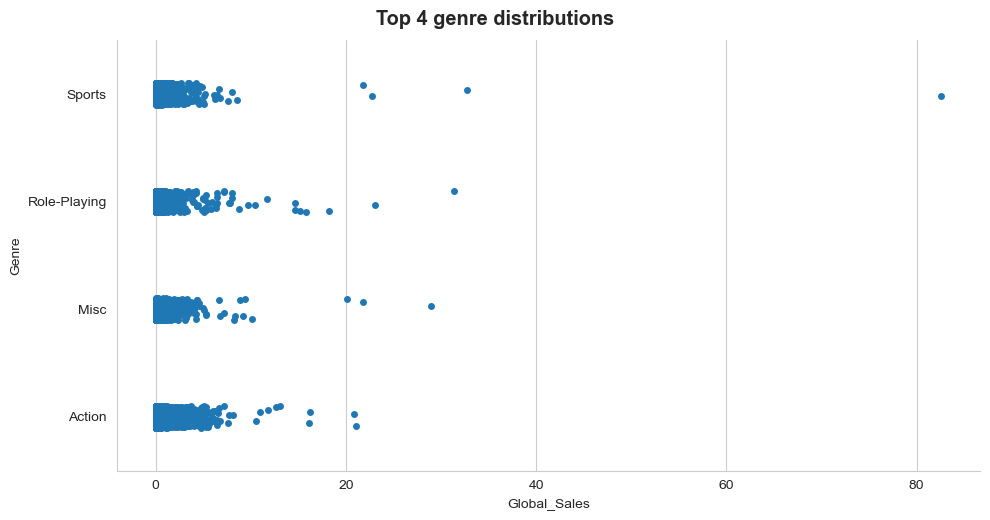

In [41]:
ax = sns.catplot(data=top4_genre_2, x='Global_Sales', y='Genre', height=5, aspect=2);
ax.figure.suptitle('Top 4 genre distributions', y=1.03, weight='bold', size='x-large');

From this first catplot we can notice the every genre has outliers, being the 'Sports' genre the one that has the furthest outlier.

Following this catplot, we will see the distributions of the top 4 platforms within the top 4 genres, by performing this, we will be able to find in which platform is the furthest outlier.

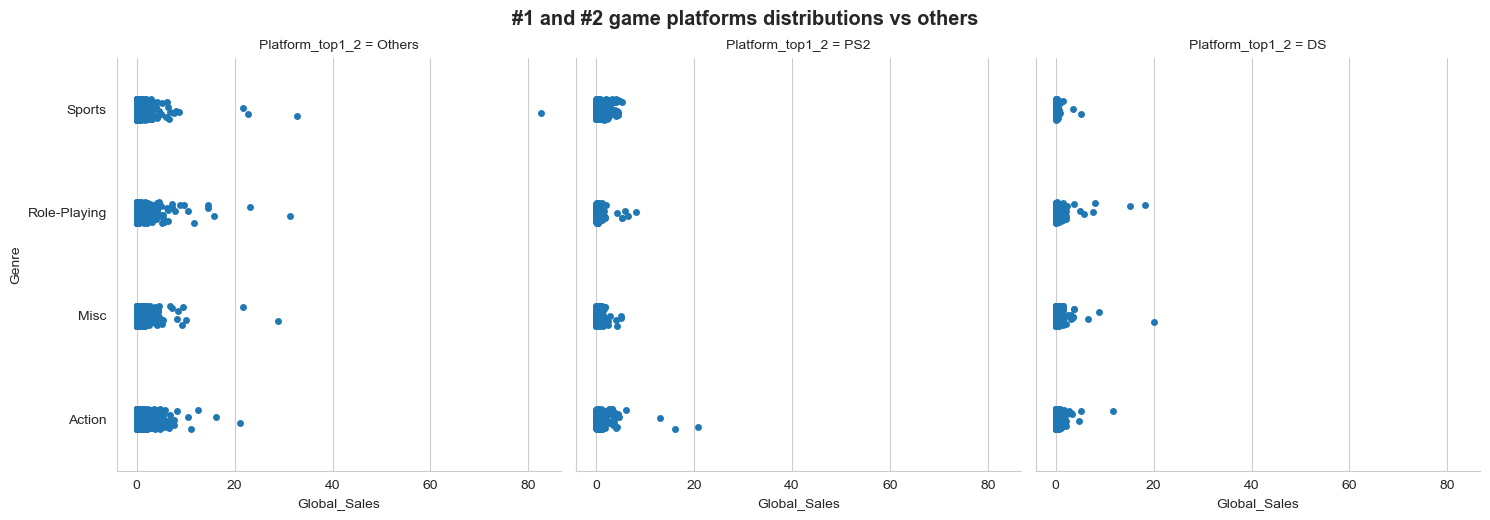

In [42]:
ax = sns.catplot(data=top4_genre_2, x='Global_Sales', y='Genre', col='Platform_top1_2', height=5, aspect=1);
ax.figure.suptitle('#1 and #2 game platforms distributions vs others', y=1.03, weight='bold', size='x-large');

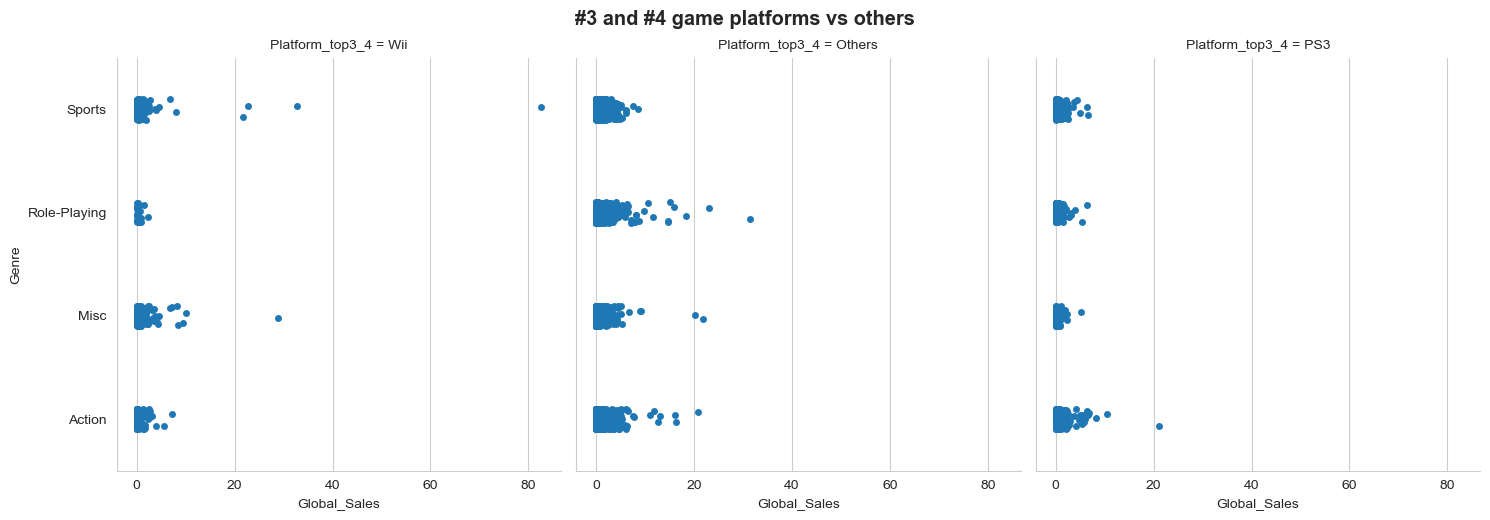

In [43]:
ax = sns.catplot(data=top4_genre_2, x='Global_Sales', y='Genre', col='Platform_top3_4', height=5, aspect=1);
ax.figure.suptitle('#3 and #4 game platforms vs others', y=1.03, weight='bold', size='x-large');

From our platform catplots, we can observe that the Wii platform is the one that has the furthest outlier, additionally, we are able to say that Nintendo (Wii and DS) has more outliers than PlayStation (PS2 and PS3).

### Part 1: Task 4
•	Do older games (2005 and earlier) have a higher MEAN “eu_sales” than newer games (after 2005)?

For this task, we will create 2 new dataset ('2005 and before' and '2005 and after') only with the features that are relevant to answer the question.

In [44]:
mean_2005 = pd.DataFrame()
mean_2005['Year_of_Release'] = df['Year_of_Release']
mean_2005['EU_Sales'] = df['EU_Sales']
mean_2005.head()

Year_of_Release  EU_Sales
0           2006.0     28.96
1           1985.0      3.58
2           2008.0     12.76
3           2009.0     10.93
4           1996.0      8.89

In [45]:
mean_2005.describe()

Year_of_Release      EU_Sales
count     16450.000000  16719.000000
mean       2006.487356      0.145025
std           5.878995      0.503283
min        1980.000000      0.000000
25%        2003.000000      0.000000
50%        2007.000000      0.020000
75%        2010.000000      0.110000
max        2020.000000     28.960000

In [46]:
mean_b_2005 = mean_2005[mean_2005['Year_of_Release'].between(1980, 2005)]
mean_b_2005.describe()

Year_of_Release     EU_Sales
count      6113.000000  6113.000000
mean       2000.453296     0.147916
std           4.593112     0.430849
min        1980.000000     0.000000
25%        1998.000000     0.010000
50%        2002.000000     0.040000
75%        2004.000000     0.120000
max        2005.000000    10.950000

In [47]:
mean_a_2005 = mean_2005[mean_2005['Year_of_Release'].between(2006, 2020)]
mean_a_2005.describe()

Year_of_Release      EU_Sales
count     10337.000000  10337.000000
mean       2010.055722      0.144723
std           2.874098      0.546552
min        2006.000000      0.000000
25%        2008.000000      0.000000
50%        2010.000000      0.010000
75%        2012.000000      0.100000
max        2020.000000     28.960000

In [48]:
plot_2005_mean = pd.DataFrame()
plot_2005_mean['Range'] = ['2005 and before', 'After 2005']
plot_2005_mean['Mean_EUsales_value'] = [mean_b_2005['EU_Sales'].mean(), mean_a_2005['EU_Sales'].mean()]
plot_2005_mean

Range  Mean_EUsales_value
0  2005 and before            0.147916
1       After 2005            0.144723

To visualise the mean values of '2005 and before' and '2005 and after' by EU sales we will use a bar plot with the seaborn library.

- Since this plot will only have 2 bars, we are setting the size to not have our plot in a unproportional way.
- We are setting our title on the top with bold and big letters to identify with ease what the plot is about.
- We are using the 'Spectral' palette to make the visualisation gentle to the eye and easy to differentiate one bar from another.

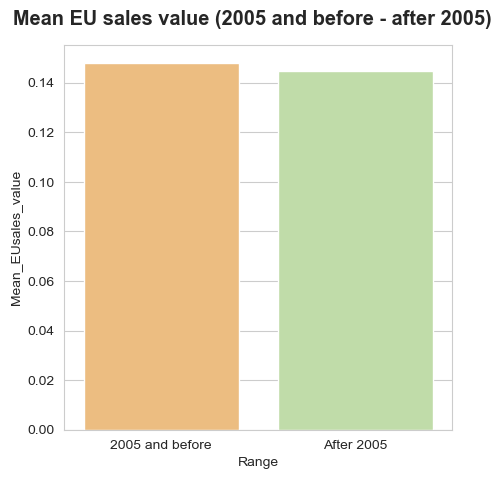

In [49]:
plt.figure(figsize=(5,5))
ax = sns.barplot(data=plot_2005_mean, x='Range', y='Mean_EUsales_value', palette='Spectral');
ax.figure.suptitle('Mean EU sales value (2005 and before - after 2005)', y=.95, weight='bold', size='x-large');

With our bar plot, we can tell that older games (2005 and before) have a higher mean value by EU sales, even though the values are quite close.

### Part 1: Task 5
•	What are the 3 most common “developer” in the dataset?

For this task, we will create a new dataset only with the features that are relevant to answer the question.

Knowing that we have 39.61% of missing values in our 'Developer' feature from our EDA, we will try to decrease this percentage by removing any duplicate values with help of the 'Name' and 'Publisher' features.

Notice that we cannot impute this type of data due to its nature (which company hired which developer to develop X game).

In [50]:
df.Developer.value_counts(dropna=False)

Developer
NaN                            6623
Ubisoft                         204
EA Sports                       172
EA Canada                       167
Konami                          162
                               ... 
Realmforge Studios                1
Sega, Tom Create                  1
Sarbakan Inc.                     1
Pacific Century Cyber Works       1
Interchannel-Holon                1
Name: count, Length: 1697, dtype: int64

In [51]:
dev = pd.DataFrame()
dev['Game'] = df['Name']
dev['Dev'] = df['Developer']
dev['Publisher'] = df['Publisher']
dev

Game       Dev     Publisher
0                         Wii Sports  Nintendo      Nintendo
1                  Super Mario Bros.       NaN      Nintendo
2                     Mario Kart Wii  Nintendo      Nintendo
3                  Wii Sports Resort  Nintendo      Nintendo
4           Pokemon Red/Pokemon Blue       NaN      Nintendo
...                              ...       ...           ...
16714  Samurai Warriors: Sanada Maru       NaN    Tecmo Koei
16715               LMA Manager 2007       NaN   Codemasters
16716        Haitaka no Psychedelica       NaN  Idea Factory
16717               Spirits & Spells       NaN       Wanadoo
16718            Winning Post 8 2016       NaN    Tecmo Koei

[16719 rows x 3 columns]

In [52]:
dev.isnull().sum() # Missing values

Game            2
Dev          6623
Publisher      54
dtype: int64

In [53]:
dev = dev.drop_duplicates(subset=['Game'], keep='first')

In [54]:
dev.isnull().sum() # Missing values

Game            1
Dev          5515
Publisher      48
dtype: int64

In [55]:
dev = dev.drop_duplicates(['Game','Dev','Publisher'], keep='first')

In [56]:
dev.isnull().sum() # Missing values

Game            1
Dev          5515
Publisher      48
dtype: int64

In [57]:
((((df['Developer'].isnull().sum())-(dev['Dev'].isnull().sum()))*100)/df['Developer'].size) 
# Improvement of percentage of missing values compared to the original data

6.627190621448651

After removing the duplicate values, we removed 6.627% of the original missing values.

In [58]:
dev

Game                Dev  \
0                              Wii Sports           Nintendo   
1                       Super Mario Bros.                NaN   
2                          Mario Kart Wii           Nintendo   
3                       Wii Sports Resort           Nintendo   
4                Pokemon Red/Pokemon Blue                NaN   
...                                   ...                ...   
16709                             15 Days  DTP Entertainment   
16711                    Aiyoku no Eustia                NaN   
16712  Woody Woodpecker in Crazy Castle 5                NaN   
16715                    LMA Manager 2007                NaN   
16716             Haitaka no Psychedelica                NaN   

               Publisher  
0               Nintendo  
1               Nintendo  
2               Nintendo  
3               Nintendo  
4               Nintendo  
...                  ...  
16709  DTP Entertainment  
16711    dramatic create  
16712              Kemco  
16715        Codemasters  
16716       Idea Factory  

[11563 rows x 3 columns]

In [59]:
dev.Dev.value_counts(dropna=True)

Dev
Ubisoft                            121
Capcom                              96
Konami                              94
Nintendo                            71
EA Canada                           60
                                  ... 
Seven45 Studios                      1
TopWare Interactive                  1
The Fun Pimps Entertainment LLC      1
Astroll                              1
Interchannel-Holon                   1
Name: count, Length: 1577, dtype: int64

In [60]:
dev_top_3 = dev.Dev.value_counts(dropna=True)
dev_top_3 = pd.DataFrame(dev_top_3)
dev_top_3['Dev'] = dev_top_3.index
dev_top_3

count                              Dev
Dev                                                                    
Ubisoft                            121                          Ubisoft
Capcom                              96                           Capcom
Konami                              94                           Konami
Nintendo                            71                         Nintendo
EA Canada                           60                        EA Canada
...                                ...                              ...
Seven45 Studios                      1                  Seven45 Studios
TopWare Interactive                  1              TopWare Interactive
The Fun Pimps Entertainment LLC      1  The Fun Pimps Entertainment LLC
Astroll                              1                          Astroll
Interchannel-Holon                   1               Interchannel-Holon

[1577 rows x 2 columns]

To visualise the top 3 developers we will use a bar plot in a horizontal way with the seaborn library.

- We are plotting this bar plot in a horizontal way due to the length that the developers names may have.
- We are setting our title on the top with bold and big letters to identify with ease what the plot is about.
- We are using red triangles to highlight the top 3 developers inside a top 10 plot.
- We are using the 'Spectral' palette to make the visualisation gentle to the eye and easy to differentiate one game from another.

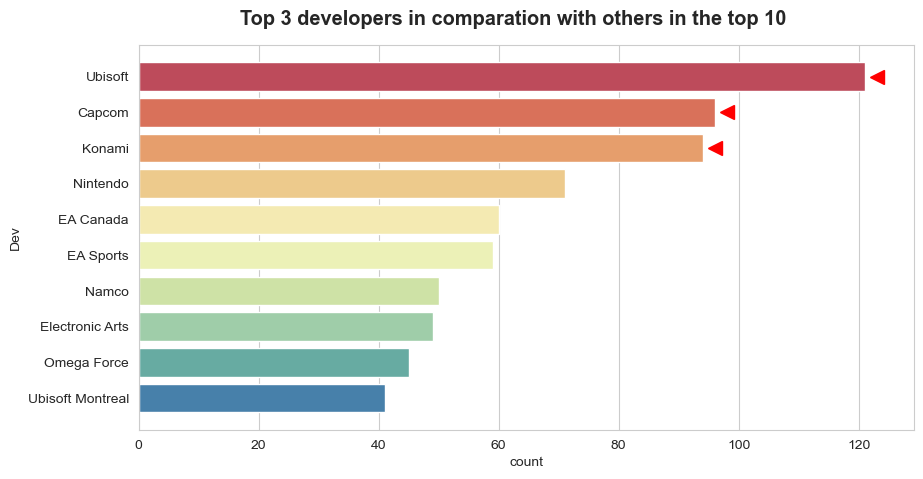

In [61]:
plt.figure(figsize=(10,5))
ax = sns.barplot( x=dev_top_3['count'], y=dev_top_3['Dev'].head(10), palette='Spectral', orient='h');
ax.figure.suptitle('Top 3 developers in comparation with others in the top 10', y=.95, weight='bold', size='x-large');
ax.plot(123,'Ubisoft', '<', markersize=10, color='r');
ax.plot(98,'Capcom', '<', markersize=10, color='r');
ax.plot(96,'Konami', '<', markersize=10, color='r');

### Part 2:

You must answer a “Statistically Relevant” question, OF YOUR OWN CHOOSING, using the dataset, that has not been asked in Part 1. This must have a logical basis that enhances the information and insight gained in the scenario.  

For this task we will taking a look at the proportions of the top 4 game genres and then observe the distributions of that genre in JP Sales, EU Sales, NA Sales and Other Sales (if their data is skewed or not).

First we will check how much each genre represent of the total.

In [62]:
top4_genre_proportions = df.Genre.value_counts(normalize=True, dropna=False) * 100 # Percentage of each genre

In [63]:
top4_genre_proportions

Genre
Action          20.156708
Sports          14.043902
Misc            10.467133
Role-Playing     8.971828
Shooter          7.913153
Adventure        7.793528
Racing           7.470542
Platform         5.311322
Simulation       5.227585
Fighting         5.078055
Strategy         4.085173
Puzzle           3.469107
NaN              0.011962
Name: proportion, dtype: float64

To visualise the top 4 genres by participation we will use a bar plot with the seaborn library.

- We are setting our title on the top with bold and big letters to identify with ease what the plot is about.
- We are using red triangles to highlight the top 4 genres.
- We are using the 'Spectral' palette to make the visualisation gentle to the eye and easy to differentiate each genre.

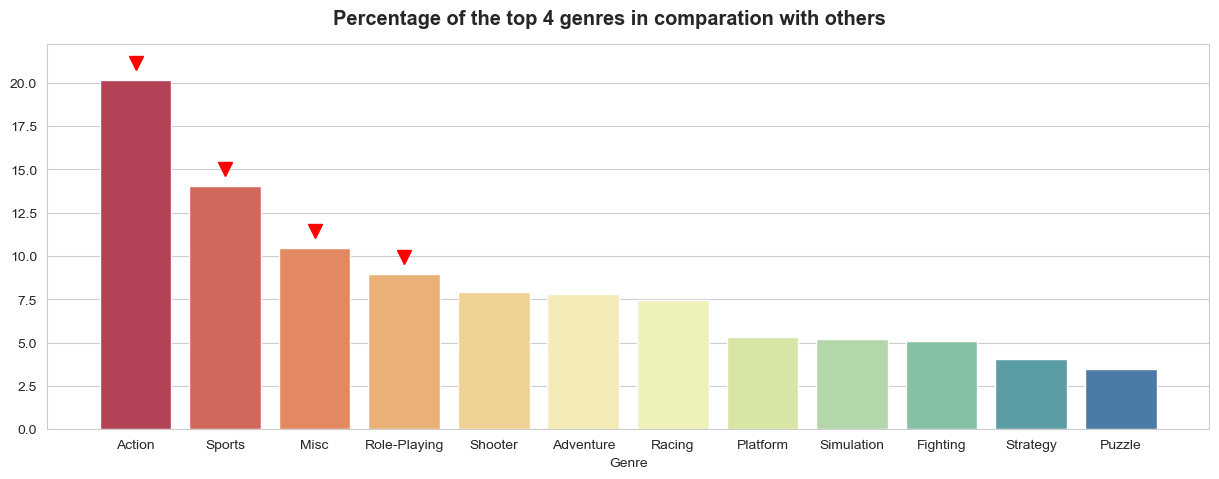

In [64]:
plt.figure(figsize=(15,5))
ax = sns.barplot( x=top4_genre_proportions.index, y=top4_genre_proportions.values, palette= 'Spectral');
ax.figure.suptitle('Percentage of the top 4 genres in comparation with others', y=.95, weight='bold', size='x-large');
ax.plot('Action', 21.156, 'v', markersize=10, color='r');
ax.plot('Sports', 15.043, 'v', markersize=10, color='r');
ax.plot('Misc', 11.467, 'v', markersize=10, color='r');
ax.plot('Role-Playing', 9.971, 'v', markersize=10, color='r');

As shown above, the 'Action' genre represents slightly over 20% of the total genres, with this we will take a look to the data distributions in each sales feature of the 'Action' genre.

For this nest task, we will create a new dataset only with the features that are relevant (all the sales features but global sales of the 'Action' genre).

In [65]:
top1 = ['Action']
mask_v2 = df['Genre'].isin(top1)
top1_genre_proportions = df[mask_v2]

In [66]:
top1_genre_proportions

Name Platform  Year_of_Release   Genre  \
16                    Grand Theft Auto V      PS3           2013.0  Action   
17         Grand Theft Auto: San Andreas      PS2           2004.0  Action   
23                    Grand Theft Auto V     X360           2013.0  Action   
24           Grand Theft Auto: Vice City      PS2           2002.0  Action   
38                  Grand Theft Auto III      PS2           2001.0  Action   
...                                  ...      ...              ...     ...   
16696  Metal Gear Solid V: Ground Zeroes       PC           2014.0  Action   
16698                     Carmageddon 64      N64           1999.0  Action   
16699                    Planet Monsters      GBA           2001.0  Action   
16703              The Longest 5 Minutes      PSV           2016.0  Action   
16714      Samurai Warriors: Sanada Maru      PS3           2016.0  Action   

                          Publisher  NA_Sales  EU_Sales  JP_Sales  \
16             Take-Two Interactive      7.02      9.09      0.98   
17             Take-Two Interactive      9.43      0.40      0.41   
23             Take-Two Interactive      9.66      5.14      0.06   
24             Take-Two Interactive      8.41      5.49      0.47   
38             Take-Two Interactive      6.99      4.51      0.30   
...                             ...       ...       ...       ...   
16696  Konami Digital Entertainment      0.00      0.01      0.00   
16698            Virgin Interactive      0.01      0.00      0.00   
16699                         Titus      0.01      0.00      0.00   
16703          Nippon Ichi Software      0.00      0.00      0.01   
16714                    Tecmo Koei      0.00      0.00      0.01   

       Other_Sales  Global_Sales  Critic_Score  Critic_Count User_Score  \
16            3.96         21.04          97.0          50.0        8.2   
17           10.57         20.81          95.0          80.0          9   
23            1.41         16.27          97.0          58.0        8.1   
24            1.78         16.15          95.0          62.0        8.7   
38            1.30         13.10          97.0          56.0        8.5   
...            ...           ...           ...           ...        ...   
16696         0.00          0.01          80.0          20.0        7.6   
16698         0.00          0.01           NaN           NaN        NaN   
16699         0.00          0.01          67.0           9.0        tbd   
16703         0.00          0.01           NaN           NaN        NaN   
16714         0.00          0.01           NaN           NaN        NaN   

       User_Count           Developer Rating  
16         3994.0      Rockstar North      M  
17         1588.0      Rockstar North      M  
23         3711.0      Rockstar North      M  
24          730.0      Rockstar North      M  
38          664.0          DMA Design      M  
...           ...                 ...    ...  
16696       412.0  Kojima Productions      M  
16698         NaN                 NaN    NaN  
16699         NaN  Planet Interactive      E  
16703         NaN                 NaN    NaN  
16714         NaN                 NaN    NaN  

[3370 rows x 16 columns]

In [67]:
top1_genre_proportions_v2 = pd.DataFrame()
top1_genre_proportions_v2['Genre'] = top1_genre_proportions['Genre']
top1_genre_proportions_v2['JP_Sales'] = top1_genre_proportions['JP_Sales']
top1_genre_proportions_v2['EU_Sales'] = top1_genre_proportions['EU_Sales']
top1_genre_proportions_v2['NA_Sales'] = top1_genre_proportions['NA_Sales']
top1_genre_proportions_v2['Other_Sales'] = top1_genre_proportions['Other_Sales']

In [68]:
top1_genre_proportions_v2.head()

Genre  JP_Sales  EU_Sales  NA_Sales  Other_Sales
16  Action      0.98      9.09      7.02         3.96
17  Action      0.41      0.40      9.43        10.57
23  Action      0.06      5.14      9.66         1.41
24  Action      0.47      5.49      8.41         1.78
38  Action      0.30      4.51      6.99         1.30

In [69]:
top1_genre_proportions_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3370 entries, 16 to 16714
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Genre        3370 non-null   object 
 1   JP_Sales     3370 non-null   float64
 2   EU_Sales     3370 non-null   float64
 3   NA_Sales     3370 non-null   float64
 4   Other_Sales  3370 non-null   float64
dtypes: float64(4), object(1)
memory usage: 158.0+ KB


In [70]:
top1_genre_proportions_v2.isnull().sum()

Genre          0
JP_Sales       0
EU_Sales       0
NA_Sales       0
Other_Sales    0
dtype: int64

To visualise the distributions of each sales category wihtin the 'Action' genre, we will use a displot with the seaborn library.

- We are setting height and aspect values to shape the plot in a way that the distribution can be visible.
- We are setting 'y' value limit to not have too much of white space. 
- We are setting our title on the top with bold and big letters to identify with ease what the plot is about.
- We are using a red line to highlight the mean values.
- We are using a yellow line to highlight the median values.

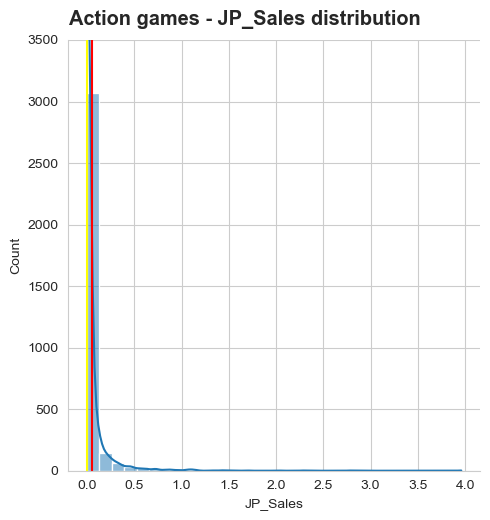

In [71]:
ax = sns.displot(data=top1_genre_proportions_v2, x='JP_Sales', kde=True, height=5, aspect=1, bins=30);
plt.ylim(0,3500);
ax.figure.suptitle('Action games - JP_Sales distribution', y=1.03, weight='bold', size='x-large');
plt.axvline(x=top1_genre_proportions_v2.JP_Sales.mean(), color='red'); # Add the mean value with a vertical red line
plt.axvline(x=top1_genre_proportions_v2.JP_Sales.median(), color='yellow'); # Add the median value with a vertical red line

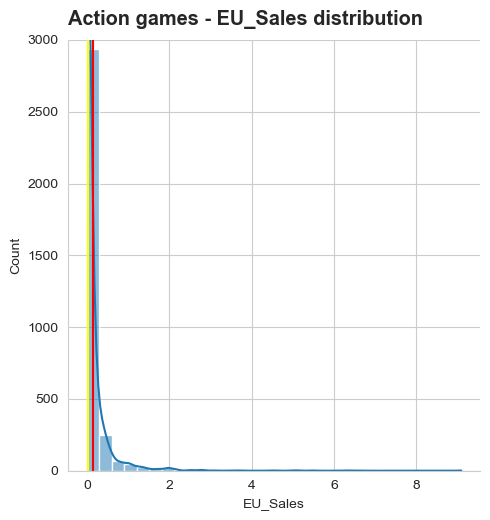

In [72]:
ax = sns.displot(data=top1_genre_proportions_v2, x='EU_Sales', kde=True, height=5, aspect=1, bins=30);
plt.ylim(0,3000);
ax.figure.suptitle('Action games - EU_Sales distribution', y=1.03, weight='bold', size='x-large');
plt.axvline(x=top1_genre_proportions_v2.EU_Sales.mean(), color='red'); # Add the mean value with a vertical red line
plt.axvline(x=top1_genre_proportions_v2.EU_Sales.median(), color='yellow'); # Add the median value with a vertical red line

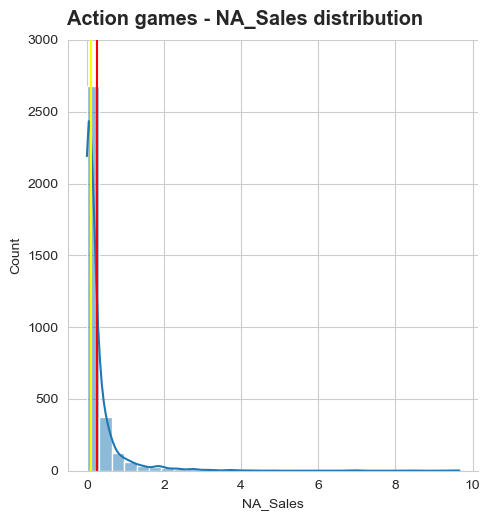

In [73]:
ax = sns.displot(data=top1_genre_proportions_v2, x='NA_Sales', kde=True, height=5, aspect=1, bins=30);
plt.ylim(0,3000);
ax.figure.suptitle('Action games - NA_Sales distribution', y=1.03, weight='bold', size='x-large');
plt.axvline(x=top1_genre_proportions_v2.NA_Sales.mean(), color='red'); # Add the mean value with a vertical red line
plt.axvline(x=top1_genre_proportions_v2.NA_Sales.median(), color='yellow'); # Add the median value with a vertical red line

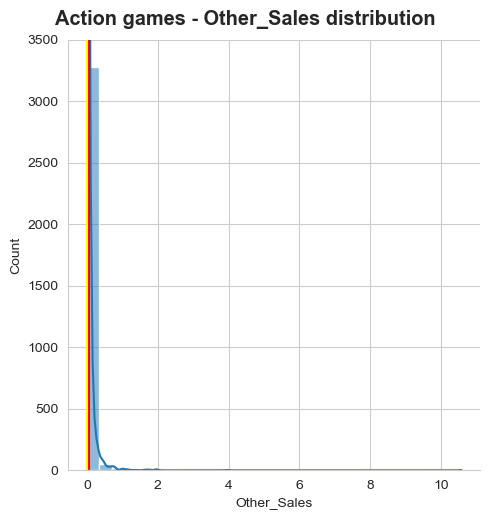

In [74]:
ax = sns.displot(data=top1_genre_proportions_v2, x='Other_Sales', height=5, aspect=1, kde=True, bins=30);
plt.ylim(0,3500);
ax.figure.suptitle('Action games - Other_Sales distribution', y=1.03, weight='bold', size='x-large');
plt.axvline(x=top1_genre_proportions_v2.Other_Sales.mean(), color='red');# Add the mean value with a vertical red line
plt.axvline(x=top1_genre_proportions_v2.Other_Sales.median(), color='yellow'); # Add the median value with a vertical red line

After observing the mean and median values of the sales categories of the 'Action' genre, we can say that the 'Action' genre sales data is positively skewed, which means that the majority of the data point clusters towards the lower end; positively skewed can be a result of multiple causes like:
 
- Unequally distributed data
- Homogenous groups
- Lower boundaries in a data set

(Indeed Editorial Team, 2022).

### Part 3:

You must explain, in detail,    
 - why you chose the specific methods to engineer the data and how you achieved this in python (Part 1/Part 2)  
 - why you chose your specific visualizations to illustrate each answer (Part 1/Part 2)  
 - what design decisions you made for each visualization (for example, but not only: colour, font, titles, size, text position, font size etc) (Part 1/Part 2)  
 - what your rationale is for the visualization created in Part 2 and how your question enhances the information and insight gained in the scenario (Part 2)    

## GitHub:

https://github.com/LeopoldoCCT/DataVis_Techniques-

## References:

Indeed Editorial Team (2023). Bar Chart vs. Histogram: Uses and Primary Differences. [online] Available at: https://ca.indeed.com/career-advice/career-development/bar-chart-vs-histogram [Accessed 7 Apr. 2024].

Indeed Editorial Team (2023a). A Guide to Scatter Plots (With Uses and Advantages). [online] Available at: https://www.indeed.com/career-advice/career-development/a-guide-to-scatter-plots [Accessed 7 Apr. 2024].

The University of Iowa (n.d.). Strip Plots. [online] homepage.stat.uiowa.edu. Available at: https://homepage.stat.uiowa.edu/~luke/classes/STAT4580/stripplot.html#some-notes [Accessed 7 Apr. 2024].

Seaborn (n.d.). seaborn.histplot — seaborn 0.11.2 documentation. [online] seaborn.pydata.org. Available at: https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot [Accessed 7 Apr. 2024].

Indeed Editorial Team (2022). What is a positively skewed distribution? (With examples). [online] Available at: https://uk.indeed.com/career-advice/career-development/positively-skewed-distribution [Accessed 7 Apr. 2024].